In [7]:
import torch
import torchvision
from torchvision import transforms, datasets

In [10]:
# latter on, you can write your own dataset and your own syntax.
# It is tedious to convert the dataset into neural network
# but you can write your own to transform dataset into neural network. 
train = datasets.MNIST(root="", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST(root="", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

100.0%


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


100.0%
2.0%


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100.0%
100.0%


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [11]:
trainset = torch.utils.data.DataLoader (train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader (test, batch_size=10, shuffle=True)

In [33]:
import pandas as pd
for data in trainset:
    print('data[0].shape:', data[0].shape)
    print('data[1].shape:', data[1].shape)
    print('data:', data)
    break   # We don't want to run all. We just run one

data[0].shape: torch.Size([10, 1, 28, 28])
data[1].shape: torch.Size([10])
data: [tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
      

In [44]:
# first tensor is X data
# second tensor is your lable y data.
# data[0]: Image X data, data[1]: y label
print('data[0].shape:', data[0].shape)
print('data[1].shape:', data[1].shape)
x1, y1 = data[0], data[1]
#print('x1:', x1)
print('y1:', y1) 
# y: tensor([8, 2, 2, 2, 9, 2, 0, 6, 9, 1])
# Below are label = 8, 2, 2, 2, ...
# we select first element
x, y = data[0][0], data[1][0]
#print('x:', x)
print('data[1][0]:', data[1][0])
print('y:', y) 

data[0].shape: torch.Size([10, 1, 28, 28])
data[1].shape: torch.Size([10])
y1: tensor([1, 7, 8, 2, 4, 9, 1, 3, 5, 7])
data[1][0]: tensor(1)
y: tensor(1)


data[0].shape: torch.Size([10, 1, 28, 28])
data[1].shape: torch.Size([10])
data[0][0].shape: torch.Size([1, 28, 28])
data[1][0].shape: torch.Size([])


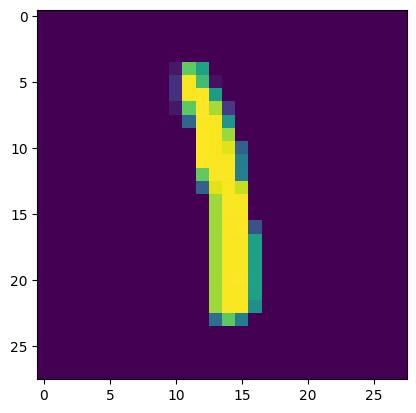

In [45]:
import matplotlib.pyplot as plt
# pip3 install matp[0]lotlib
print('data[0].shape:', data[0].shape)
print('data[1].shape:', data[1].shape)
# data[0].shape: torch.S[0]ize([10, 1, 28, 28])
# data[1].shape: torch.Size0[10])
print('data[0][0].shape:', data[0][0].shape)
print('data[1][0].shape:', data[1][0].shape)
# data[0][0].shape: torch.Size([1, 28, 28])
# data[1][0].shape: torch.Size([])
# [1, 28, 28] is not a typical image. You cannot image show.
# We can only show [28, 28].
#plt.imshow(data[0][0])
plt.imshow(data[0][0].view(28, 28))
plt.show()

In [50]:
# Count the digit distribution in dataset
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for data in trainset:
    xs, ys = data
    if total == 0:
        #print('xs:', xs)
        print('ys:', ys)
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print('counter_dict:', counter_dict)

ys: tensor([4, 0, 3, 2, 9, 5, 7, 4, 6, 5])
counter_dict: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [53]:
# Change into precentage
for i in counter_dict:
    print(f"{i}: {(counter_dict[i]/total) * 100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
